In [180]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)

In [181]:
g1 = basis(5,0)
g2 = basis(5,1)
m1 = basis(5,2)
m2 = basis(5,3)
e = basis(5,4)

In [182]:
def boltzmann(gs, T):
    return np.exp(-6.26e-34*gs*1e9/(1.38e-23*T))

def sigmoid(t, risetime, t0):
    a = risetime/(2*4.4)
    return 1/(np.exp(-(t-t0)/a)+1)

def pulse(t, risetime, pulsewidth, t0):
    return np.where(t<pulsewidth/2+t0, sigmoid(t,risetime,t0),1-sigmoid(t,risetime,t0+pulsewidth))

def seqC3(t, args): 
    tstart = args['tstart']
    pulsewidth = args['pulsewidth']
    return np.where(t<pulsewidth/2+tstart, sigmoid(t,0.86,4+tstart),1-sigmoid(t,0.86,pulsewidth+2+tstart))

In [216]:
Gamma1 = 1/2
Gamma2 = Gamma1

Gamma_spin = 1/(2*np.pi*100)
Gamma_spin_deph = 1/(2*np.pi*1000)
Gamma_orb = 1/(2*np.pi*40)

gs = 50
T = 4

c:\program files (x86)\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


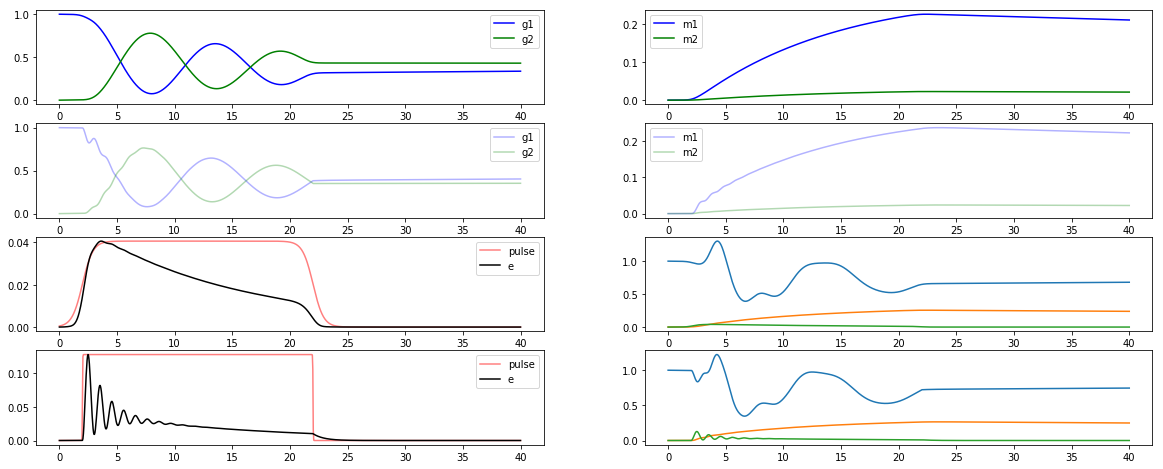

In [217]:
pulsewidth = 20
risetime = 5
tlist = np.linspace(0, 2*pulsewidth, 1000)

delta = 5
Delta = 0
eta = 0.1
sat = 5
H = Delta*g2*g2.dag() + delta*e*e.dag()

Omega1 = sat*Gamma1
Omega2 = sat*Gamma2

Hint1 = Omega1/2 * (g1*e.dag() + e*g1.dag())
Hint2 = Omega2/2 * (g2*e.dag() + e*g2.dag())

c_ops = [
    np.sqrt(Gamma1)*g1*e.dag(),
    np.sqrt(eta*Gamma1)*g2*e.dag(),
    np.sqrt(Gamma2)*m1*e.dag(),
    np.sqrt(eta*Gamma2)*m2*e.dag(),
    np.sqrt(Gamma_spin)*g1*g2.dag(),
    np.sqrt(Gamma_spin*boltzmann(5,T))*g2*g1.dag(),
    np.sqrt(Gamma_orb)*(g1 + eta*g2)*m1.dag(),
    np.sqrt(Gamma_orb*boltzmann(5,T))*(eta*g1 + g2)*m2.dag(),
    np.sqrt(Gamma_spin_deph)*(g2*g2.dag() - g1*g1.dag())
]
e_ops = [
    g1*g1.dag(),
    g2*g2.dag(),
    m1*m1.dag(),
    m2*m2.dag(),
    e*e.dag()
]
rho0 = g1*g1.dag()

risetime_sig = 4
risetime_step = 0.1

result_sig = mesolve([H, [Hint1 + Hint2, pulse(tlist, risetime_sig, pulsewidth, risetime_sig/2)]], rho0, tlist, e_ops=e_ops, c_ops=c_ops)
result_step = mesolve([H, [Hint1 + Hint2, pulse(tlist, risetime_step, pulsewidth, risetime_sig/2)]], rho0, tlist, e_ops=e_ops, c_ops=c_ops)

fig, axs = plt.subplots(4,2)

axs[0,0].plot(tlist, result_sig.expect[0], label='g1', color='b')
axs[0,0].plot(tlist, result_sig.expect[1], label='g2', color='g')
axs[0,0].legend()
axs[1,0].plot(tlist, result_step.expect[0], label='g1', color='b', alpha=0.3)
axs[1,0].plot(tlist, result_step.expect[1], label='g2', color='g', alpha=0.3)
axs[1,0].legend()

axs[0,1].plot(tlist, result_sig.expect[2], label='m1', color='b')
axs[0,1].plot(tlist, result_sig.expect[3], label='m2', color='g')
axs[0,1].legend()
axs[1,1].plot(tlist, result_step.expect[2], label='m1', color='b', alpha=.3)
axs[1,1].plot(tlist, result_step.expect[3], label='m2', color='g', alpha=.3)
axs[1,1].legend()

axs[2,0].plot(tlist, pulse(tlist, risetime_sig, pulsewidth, risetime_sig/2)*np.amax(result_sig.expect[4]), label='pulse', color='r', alpha=0.5)
axs[2,0].plot(tlist, result_sig.expect[4], label='e', color='k')
axs[2,0].legend()
axs[3,0].plot(tlist, pulse(tlist, risetime_step, pulsewidth, risetime_sig/2)*np.amax(result_step.expect[4]), label='pulse', color='r', alpha=0.5)
axs[3,0].plot(tlist, result_step.expect[4], label='e', color='k')
axs[3,0].legend()

axs[2,1].plot(tlist, result_sig.expect[0]+result.expect[1])
axs[2,1].plot(tlist, result_sig.expect[2]+result.expect[3])
axs[2,1].plot(tlist, result_sig.expect[4])
axs[3,1].plot(tlist, result_step.expect[0]+result.expect[1])
axs[3,1].plot(tlist, result_step.expect[2]+result.expect[3])
axs[3,1].plot(tlist, result_step.expect[4])

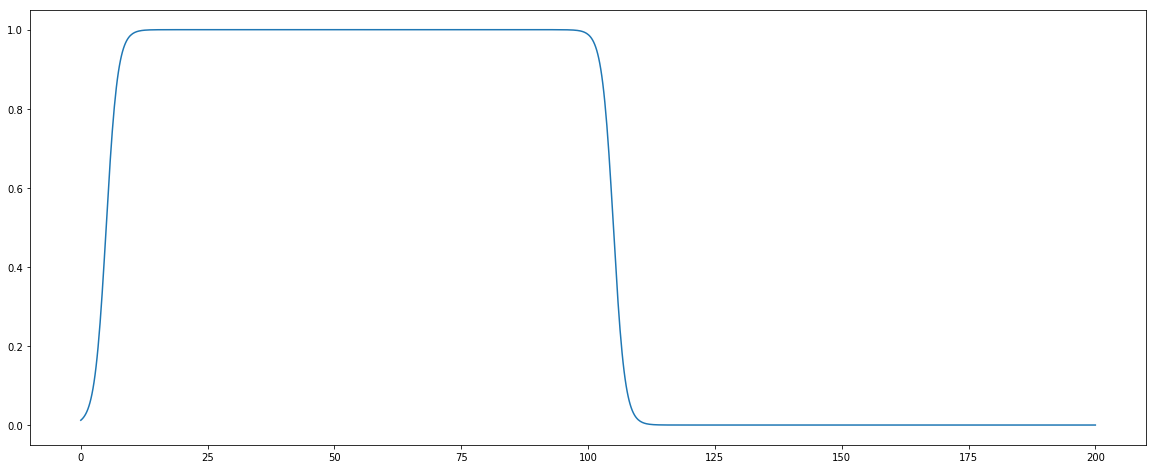

In [185]:
plt.plot(tlist, pulse(tlist, 10, 100,5))